In [1]:
import glob as glob
import pandas as pd
import seaborn as sns

In [2]:
# CO Historical precerature (F) and Precipitation (inch/day)
hist = pd.DataFrame()
for file in glob.glob('data/climate/*.parquet'):
    hist = pd.concat([hist, pd.read_parquet(file)])

hist = hist.groupby('date', as_index=False)[['avgtempf','precpinch']].mean()
hist_end_date = hist['date'].max()
hist['Decades'] = hist['date'].dt.year // 10 * 10
hist_decades = hist.groupby('Decades', as_index=False)[['avgtempf','precpinch']].mean()

In [3]:
# CO RCP Temperature

rcp45_temp = pd.DataFrame()
for file in glob.glob('data/scenarios/rcp45_temp*.parquet'):
    rcp45_temp = pd.concat([rcp45_temp, pd.read_parquet(file)])

rcp45_temp['tempf'] = rcp45_temp['temp'] * 9/5 + 32
rcp45_temp = rcp45_temp[rcp45_temp['time'] > hist_end_date].drop_duplicates(subset='time')
rcp45_temp['Decades'] = rcp45_temp['time'].dt.year // 10 * 10
rcp45_temp_decades = rcp45_temp.groupby('Decades', as_index=False)['tempf'].mean()

rcp85_temp = pd.DataFrame()
for file in glob.glob('data/scenarios/rcp85_temp*.parquet'):
    rcp85_temp = pd.concat([rcp85_temp, pd.read_parquet(file)])

rcp85_temp['tempf'] = rcp85_temp['temp'] * 9/5 + 32
rcp85_temp = rcp85_temp[rcp85_temp['time'] > hist_end_date].drop_duplicates(subset='time')
rcp85_temp['Decades'] = rcp85_temp['time'].dt.year // 10 * 10
rcp85_temp_decades = rcp85_temp.groupby('Decades', as_index=False)['tempf'].mean()

[Text(0.5, 1.0, 'RCP45 Temperature (°F)')]

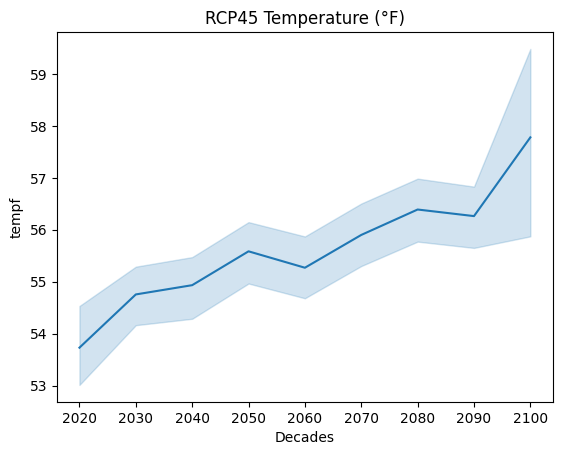

In [8]:
# temp_plot = sns.lineplot(
#     hist,
#     y='avgtempf',
#     x='Decades',
# )

temp_plot = sns.lineplot(
    rcp45_temp,
    y='tempf',
    x='Decades',
)

temp_plot.set(title='RCP45 Temperature (°F)')

[Text(0.5, 1.0, 'RCP85 Temperature (°F)')]

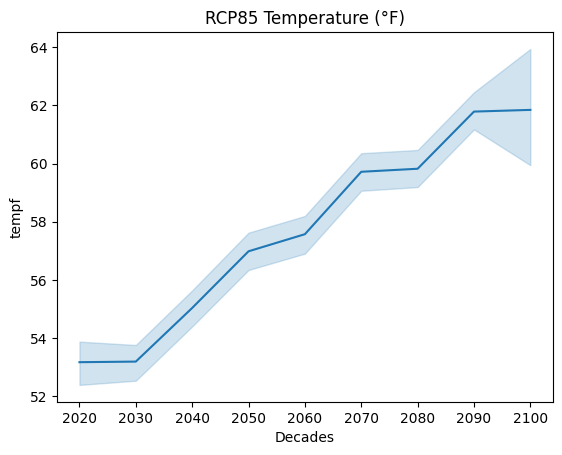

In [9]:
rcp85_temp = rcp85_temp[rcp85_temp['time'] > hist_end_date].drop_duplicates(subset='time')

# temp_plot = sns.lineplot(
#     hist,
#     y='avgtempf',
#     x='date',
# )

temp_plot = sns.lineplot(
    rcp85_temp,
    y='tempf',
    x='Decades',
)

temp_plot.set(title='RCP85 Temperature (°F)')

In [89]:
# CO RCP Precipitation

rcp45_prec = pd.DataFrame()
for file in glob.glob('data/scenarios/rcp45_prec*.parquet'):
    rcp45_prec = pd.concat([rcp45_prec, pd.read_parquet(file)])

rcp45_prec['precinch'] = rcp45_prec['prec'] / 25.4 
rcp45_prec['Decades'] = rcp45_prec['time'].dt.year // 10 * 10

rcp85_prec = pd.DataFrame()
for file in glob.glob('data/scenarios/rcp85_prec*.parquet'):
    rcp85_prec = pd.concat([rcp85_prec, pd.read_parquet(file)])

rcp85_prec['precinch'] = rcp85_prec['prec'] / 25.4
rcp85_prec['Decades'] = rcp85_prec['time'].dt.year // 10 * 10

[Text(0.5, 1.0, 'RCP45 Precipitation (inch/day)')]

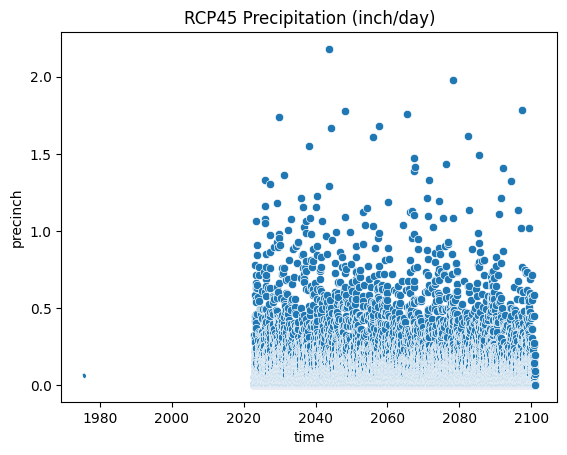

In [93]:
rcp45_prec = rcp45_prec[rcp45_prec['time'] > hist_end_date].drop_duplicates(subset='time')

prec_plot = sns.scatterplot(
    rcp45_prec,
    y='precinch',
    x='time',
)

prec_plot = sns.lineplot(
    rcp45_prec,
    y='precinch',
    x='Decades',
)

prec_plot.set(title='RCP45 Precipitation (inch/day)')

[Text(0.5, 1.0, 'RCP85 Precipitation (inch/day)')]

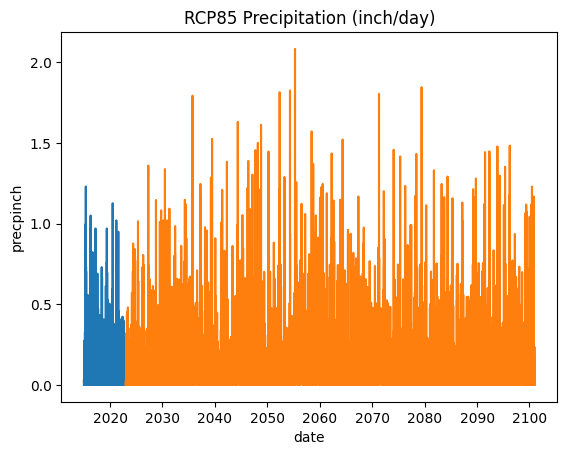

In [10]:
rcp85_prec = rcp85_prec[rcp85_prec['time'] > hist_end_date].drop_duplicates(subset='time')

prec_plot = sns.lineplot(
    hist,
    y='precpinch',
    x='date',
)

prec_plot = sns.lineplot(
    rcp85_prec,
    y='precinch',
    x='time',
)

prec_plot.set(title='RCP85 Precipitation (inch/day)')

In [11]:
df_gwl_muddy_creek = pd.read_parquet('data/gwl/df_gwl_muddy_creek.parquet')
df_gwl_pueblo = pd.read_parquet('data/gwl/df_gwl_pueblo.parquet')
df_gwl_kit_carson = pd.read_parquet('data/gwl/df_gwl_kit_carson.parquet')

In [24]:
df_gwl_muddy_creek['Site'] = 'Muddy Creek'
df_gwl_pueblo['Site'] = 'Pueblo'
df_gwl_kit_carson['Site'] = 'Kit Carson'

gwl = pd.concat(
    [
        df_gwl_kit_carson,
        df_gwl_muddy_creek,
        df_gwl_pueblo
    ]
)

gwl

,datetime,gwl,Site
0,2017-05-25 00:00:00+00:00,49.33,Kit Carson
1,2017-05-26 00:00:00+00:00,49.32,Kit Carson
2,2017-05-27 00:00:00+00:00,49.33,Kit Carson
3,2017-05-28 00:00:00+00:00,49.32,Kit Carson
4,2017-05-29 00:00:00+00:00,49.31,Kit Carson
...,...,...,...
2384,2022-11-26 00:00:00+00:00,22.19,Pueblo
2385,2022-11-27 00:00:00+00:00,22.18,Pueblo
2386,2022-11-28 00:00:00+00:00,22.18,Pueblo
2387,2022-11-29 00:00:00+00:00,22.18,Pueblo


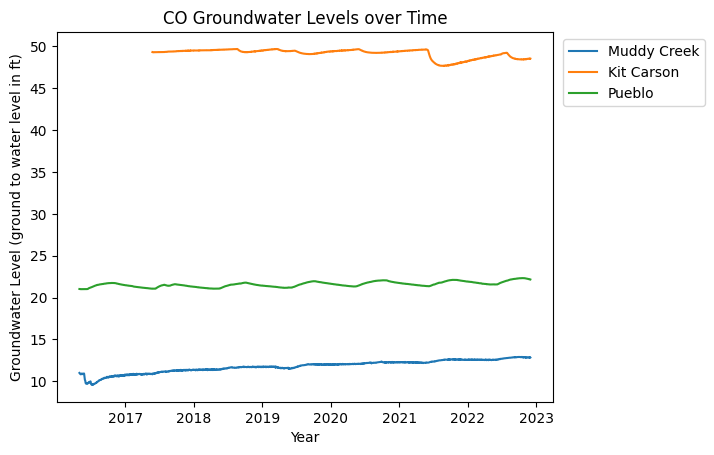

In [64]:
fig = sns.lineplot(df_gwl_muddy_creek, x='datetime', y='gwl', style='Site')

fig = sns.lineplot(df_gwl_kit_carson, x='datetime', y='gwl', style='Site')

fig = sns.lineplot(df_gwl_pueblo, x='datetime', y='gwl', style='Site')

fig.set(title='CO Groundwater Levels over Time', 
        ylabel='Groundwater Level (ground to water level in ft)',
        xlabel='Year')

fig.legend(loc=1, bbox_to_anchor=(1.32, 1))